In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inventory = pd.read_csv("inventory.csv")
products = pd.read_csv("products.csv")
discounts = pd.read_csv("promotions.csv")
transactions = pd.read_csv("transactions.csv")

In [7]:
transactions

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic
0,1/1/2018,9:07:00,0.0,NaN,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0
1,1/1/2018,9:07:00,0.0,NaN,meat,m_16,Sappige gelders rookworst,250g,1.08,1.08,0.0,0.0
2,1/1/2018,9:07:00,0.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,1.99,NaN,0.0
3,1/1/2018,9:07:00,0.0,NaN,meat,m_6,Half om half gehakt,500g,2.69,2.42,0.0,0.0
4,1/1/2018,9:07:00,0.0,NaN,bread,b_33,Biologisch bruin heel,1st,2.12,2.12,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354860,30-12-2018,20:59:33,20685.0,NaN,meat,m_1,Rundergehakt,500g,3.69,3.69,0.0,0.0
354861,30-12-2018,20:59:33,20685.0,NaN,fruit,f_26,Biologische rozijnen,250g,2.99,2.99,1.0,0.0
354862,30-12-2018,20:59:33,20685.0,NaN,meat,m_24,Gekruide runderchipolata,8st,3.19,3.19,0.0,0.0
354863,30-12-2018,20:59:33,20685.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,2.49,0.0,0.0


In [8]:
transactions['day'] = pd.to_datetime(transactions['day'])
transactions['time'] = pd.to_datetime(transactions['time'])
transactions['week'] = transactions['day'].dt.strftime('%U')
transactions['week'] = pd.to_numeric(transactions['week'])
transactions['hour'] = transactions['time'].dt.strftime('%H')

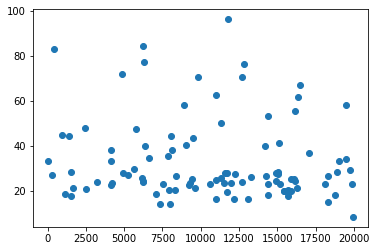

In [9]:
# how much does each customer (incl. repeats) spend per trip?
spent_each = transactions.groupby('customer')['purchase_price'].sum()
# on average, each customer spends 31.64 per trip
spent_each = spent_each.sample(n=100)
plt.scatter(spent_each.index, spent_each)
plt.show()

In [5]:
# What percentage of customers is paying by card and is a regular customer?

In [6]:
customers = transactions[["customer", "bank acount"]]

In [7]:
# new row for every product a customer buys, so customer and bank act columns are identical for two products
unique_customers = customers.drop_duplicates()
unique_customers

,customer,bank acount
0,0.0,NaN
13,1.0,NaN
23,2.0,72461338.0
39,3.0,25672381.0
52,4.0,304428.0
...,...,...
354759,20681.0,51945522.0
354770,20682.0,NaN
354793,20683.0,65327490.0
354815,20684.0,1064747.0


In [8]:
# nrs appearing for bank act means they paid w one
bankact = unique_customers[unique_customers['bank acount'] > 0]
bankact

,customer,bank acount
23,2.0,72461338.0
39,3.0,25672381.0
52,4.0,304428.0
67,5.0,50330345.0
87,6.0,54211938.0
...,...,...
354712,20679.0,1064747.0
354730,20680.0,9697098.0
354759,20681.0,51945522.0
354793,20683.0,65327490.0


In [9]:
# % of customers w bank act
len(bankact) / len(unique_customers)

0.8282613824015098

In [111]:
# at what time do customers come most often?

In [46]:
transactions.drop_duplicates(subset=['customer'])

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic,week,hour
0,2018-01-01,2021-03-03 09:07:00,0.0,NaN,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0,0.0,09
13,2018-01-01,2021-03-03 09:50:08,1.0,NaN,bread,b_37,Melkbroodjes,2st,1.79,1.79,0.0,0.0,0.0,09
23,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,meat,m_4,Mini gourmet hamburgers,200g,1.29,1.29,0.0,0.0,0.0,09
39,2018-01-01,2021-03-03 10:16:33,3.0,25672381.0,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0,0.0,10
52,2018-01-01,2021-03-03 10:25:31,4.0,304428.0,vegetable,v_6,Geschrapte worteltjes,500g,1.59,1.59,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354759,2018-12-30,2021-03-03 19:38:35,20681.0,51945522.0,meat,m_12,Unox Gelderse rookworst,375g,3.79,2.65,0.0,0.0,52.0,19
354770,2018-12-30,2021-03-03 19:59:18,20682.0,NaN,meat,m_2,Gerookte spekreepjes,300g,2.39,1.55,0.0,0.0,52.0,19
354793,2018-12-30,2021-03-03 20:00:07,20683.0,65327490.0,bread,b_9,Mais half,1st,1.12,1.12,0.0,0.0,52.0,20
354815,2018-12-30,2021-03-03 20:40:30,20684.0,1064747.0,bread,b_18,Bruin heel,1st,0.80,0.80,0.0,0.0,52.0,20


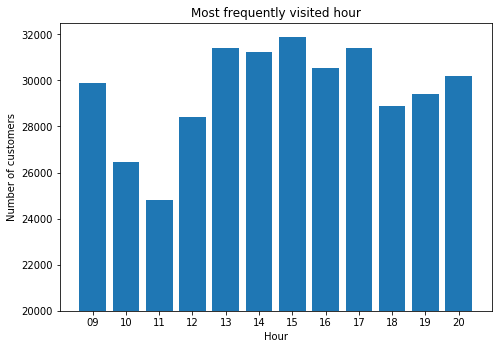

In [187]:
# hours = transactions['hour'].value_counts()
# hours = hours.sort_index()
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.set_title('Most frequently visited hour')
# plt.xlabel('Hour')
# plt.ylabel('Number of customers')
# plt.ylim([20000,32500])
# ax.bar(x=hours.index, height=hours)
# plt.savefig('hours.png',bbox_inches='tight', dpi=400)

In [10]:
# Of those paying with a bank acct, what percentage of the items are on discount?

In [27]:
bankact_full = transactions[transactions['bank acount'] > 0]
bankact_full

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic,week,hour
23,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,meat,m_4,Mini gourmet hamburgers,200g,1.29,1.29,0.0,0.0,0.0,09
24,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,meat,m_33,Mager rundergehakt,500g,3.99,3.99,0.0,0.0,0.0,09
25,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,vegetable,v_9,Basis worteltjes fijn,680g,0.89,0.89,0.0,1.0,0.0,09
26,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,meat,m_29,Veluwse rookworst fijn,280g,3.19,3.19,0.0,0.0,0.0,09
27,2018-01-01,2021-03-03 09:59:31,2.0,72461338.0,vegetable,v_2,Courgette,1st,0.75,0.71,0.0,0.0,0.0,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354839,2018-12-30,2021-03-03 20:40:30,20684.0,1064747.0,fruit,f_21,Granny smith,1.5kg,3.19,3.19,0.0,0.0,52.0,20
354840,2018-12-30,2021-03-03 20:40:30,20684.0,1064747.0,fruit,f_19,Buitenbeetjes appels,1kg,1.29,1.29,0.0,0.0,52.0,20
354841,2018-12-30,2021-03-03 20:40:30,20684.0,1064747.0,meat,m_5,Unox Gelderse rookworst,285g,3.09,2.16,0.0,0.0,52.0,20
354842,2018-12-30,2021-03-03 20:40:30,20684.0,1064747.0,vegetable,v_4,Paprika Mix,3st,1.79,1.79,0.0,0.0,52.0,20


In [43]:
bankact_full = bankact_full.drop_duplicates(subset=['customer'])
repeat_customers = bankact_full[bankact_full.duplicated(subset=['bank acount'], keep=False) == True]
repeat_customers
# repeat_customers['bank acount'].value_counts().mean()
#
# of the customers that visit more than once, on avg they visited 38 times in a year
repeat_customers.groupby('bank acount')['purchase_price'].sum()

bank acount
265671.0      85.86
267631.0      90.23
304428.0      82.34
319898.0      77.28
423613.0      47.75
              ...  
98860824.0    34.54
99023939.0    76.82
99089116.0    61.88
99461297.0    84.92
99624742.0    88.96
Name: purchase_price, Length: 400, dtype: float64

In [13]:
cash_full = transactions[transactions['bank acount'].isnull()]
cash_full

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic,week
0,2018-01-01,9:07:00,0.0,NaN,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0,0.0
1,2018-01-01,9:07:00,0.0,NaN,meat,m_16,Sappige gelders rookworst,250g,1.08,1.08,0.0,0.0,0.0
2,2018-01-01,9:07:00,0.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,1.99,NaN,0.0,0.0
3,2018-01-01,9:07:00,0.0,NaN,meat,m_6,Half om half gehakt,500g,2.69,2.42,0.0,0.0,0.0
4,2018-01-01,9:07:00,0.0,NaN,bread,b_33,Biologisch bruin heel,1st,2.12,2.12,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354860,2018-12-30,20:59:33,20685.0,NaN,meat,m_1,Rundergehakt,500g,3.69,3.69,0.0,0.0,52.0
354861,2018-12-30,20:59:33,20685.0,NaN,fruit,f_26,Biologische rozijnen,250g,2.99,2.99,1.0,0.0,52.0
354862,2018-12-30,20:59:33,20685.0,NaN,meat,m_24,Gekruide runderchipolata,8st,3.19,3.19,0.0,0.0,52.0
354863,2018-12-30,20:59:33,20685.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,2.49,0.0,0.0,52.0


In [121]:
discounts

,week,category,product_id,description,discount
0,1,vegetable,v_14,Biologische knoflook,30
1,1,vegetable,v_2,Courgette,5
2,1,vegetable,v_16,Biologische kikkererwten,10
3,1,vegetable,v_12,Biologische courgette,15
4,1,bread,b_41,Chinois brioche,30
...,...,...,...,...,...
775,52,vegetable,v_5,Paprika,10
776,52,meat,m_2,Gerookte spekreepjes,35
777,52,vegetable,v_32,Buitenbeentjes komkommer,10
778,52,meat,m_12,Unox Gelderse rookworst,30


In [101]:
discounts_amount = discounts[['category', 'description', 'discount']].copy()
# discounts_amount[discounts_amount.duplicated(keep=False) == True]
discounts_category = discounts_amount.groupby('category').describe()
# discounts_amount = discounts_amount.groupby(['category', 'description', 'discount']).size()
discounts_category['discount']['mean']

category
bread        19.175258
fruit        19.548387
meat         19.712919
snack        20.434783
vegetable    19.715909
Name: mean, dtype: float64

In [136]:
# discounts_description = discounts_amount.groupby(['category','description']).describe()
# discounts_description['discount']['mean']
discounts_description = discounts_amount[discounts_amount['category'] == 'snack']
discounts_description.groupby('description').describe()

discount                                     \
                                count       mean        std   min    25%   
description                                                                
Bakkersspeculaas                  8.0  21.250000  11.259916   5.0  13.75   
Basic chocolate chip cookies      5.0  14.000000  10.246951   5.0   5.00   
Doritos sweet chili               5.0  22.000000  10.368221  10.0  15.00   
Eierkoeken                        6.0  30.000000   5.477226  20.0  30.00   
Oreo                              5.0  20.000000  14.142136   5.0   5.00   
Ribbelchips naturel               6.0  22.500000   7.582875  15.0  16.25   
Ribbelchips paprika               5.0  16.000000  10.839742   5.0  10.00   
Vanille muffins (vers)            6.0  15.833333   9.703951   5.0  10.00   

                                                 
                               50%    75%   max  
description                                      
Bakkersspeculaas              20.0  31.25  35.0  
Basic chocolate chip cookies  10.0  25.00  25.0  
Doritos sweet chili           20.0  30.00  35.0  
Eierkoeken                    30.0  33.75  35.0  
Oreo                          25.0  30.00  35.0  
Ribbelchips naturel           22.5  25.00  35.0  
Ribbelchips paprika           10.0  25.00  30.0  
Vanille muffins (vers)        12.5  22.50  30.0

In [89]:
discounts_week = discounts[['week', 'product_id']].copy()
discounts_week

,week,product_id
0,1,v_14
1,1,v_2
2,1,v_16
3,1,v_12
4,1,b_41
...,...,...
775,52,v_5
776,52,m_2
777,52,v_32
778,52,m_12


In [16]:
bankact_week = bankact_full[['week', 'product_id']].copy()
bankact_week

,week,product_id
0,0.0,m_4
1,0.0,m_33
2,0.0,v_9
3,0.0,m_29
4,0.0,v_2
...,...,...
301237,52.0,f_21
301238,52.0,f_19
301239,52.0,m_5
301240,52.0,v_4


In [17]:
bankact_unique_week = bankact_week.drop_duplicates().reset_index(drop=True)
bankact_unique_week

,week,product_id
0,0.0,m_4
1,0.0,m_33
2,0.0,v_9
3,0.0,m_29
4,0.0,v_2
...,...,...
8373,52.0,m_10
8374,52.0,m_11
8375,52.0,m_30
8376,52.0,b_7


In [18]:
result = bankact_unique_week.append(discounts_week)
result = result.reset_index(drop=True)
result

,week,product_id
0,0.0,m_4
1,0.0,m_33
2,0.0,v_9
3,0.0,m_29
4,0.0,v_2
...,...,...
9153,52.0,v_5
9154,52.0,m_2
9155,52.0,v_32
9156,52.0,m_12


In [19]:
result[result.duplicated(keep='last')]

,week,product_id
152,4.0,s_5
181,4.0,v_29
185,4.0,b_18
213,4.0,m_7
227,4.0,f_29
...,...,...
8317,52.0,m_8
8320,52.0,v_32
8340,52.0,m_2
8361,52.0,m_21


In [20]:
#too complicated. will now see: which item appears the most often in the discount?

In [11]:
category_product = products['category'].value_counts()

In [107]:
products[products['product_id'] == 'f_4']
products[products['product_id'] == 'v_9']

,category,product_id,description,size,std_sales_price,bio,basic
8,vegetable,v_9,Basis worteltjes fijn,680g,0.89,0,1


In [34]:
discounts['product_id'].value_counts()

f_4     14
v_9     10
m_18     9
b_28     9
m_6      9
        ..
f_12     2
m_13     1
b_18     1
v_20     1
b_33     1
Name: product_id, Length: 152, dtype: int64

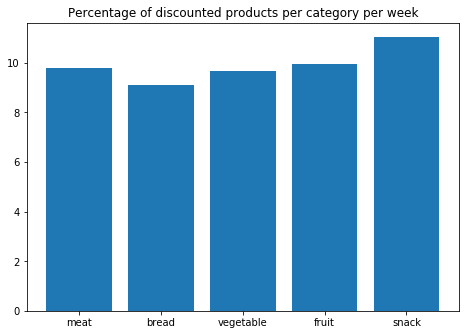

In [20]:
category_discount = discounts['category'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['meat', 'bread', 'vegetable', 'fruit', 'snack']
ax.set_title('Percentage of discounted products per category per week')
ax.bar(types, [(category_discount[0]/52)/category_product[0]*100, (category_discount[1]/52)/category_product[1]*100, (category_discount[2]/52)/category_product[2]*100, (category_discount[3]/52)/category_product[3]*100, (category_discount[4]/52)/category_product[4]*100])
plt.savefig('percentproducts.png',bbox_inches='tight', dpi=600)
# try box plot instead

In [23]:
discounts['week'].value_counts()
# every week there are 15 items on discount

52    15
51    15
24    15
23    15
22    15
21    15
20    15
19    15
18    15
17    15
16    15
15    15
14    15
13    15
12    15
11    15
10    15
9     15
8     15
7     15
6     15
5     15
4     15
3     15
2     15
25    15
26    15
27    15
40    15
50    15
49    15
48    15
47    15
46    15
45    15
44    15
43    15
42    15
41    15
39    15
28    15
38    15
37    15
36    15
35    15
34    15
33    15
32    15
31    15
30    15
29    15
1     15
Name: week, dtype: int64

In [24]:
discounts['discount'].value_counts()

30    127
10    127
5     117
15    109
20    104
35    100
25     96
Name: discount, dtype: int64

In [25]:
# What percentage of items are customers paying w bankact buying vs w cash?

In [26]:
(bankact_full['category'].value_counts()) / len(bankact_full)

vegetable    0.249344
bread        0.216085
fruit        0.211036
snack        0.179062
meat         0.143443
Name: category, dtype: float64

In [27]:
cash_full['category'].value_counts() / len(cash_full)

vegetable    0.247860
fruit        0.232419
bread        0.226489
meat         0.190814
snack        0.101542
Name: category, dtype: float64

In [28]:
# how much are customers w bank account paying total vs cash?